## Escopo programa
- Arquivo .dss contem definições sobre a simulação e o circuito
- O programa deve em python deve
1. Criar a instancia do objeto DSS
2. Deve compilar o arquivo .dss
3. Listar Monitors
4. ...
5. ...
6. ...
7. 

In [1]:
import py_dss_interface as pydss

In [2]:
import pandas as pd
import seaborn as sns
import datetime

In [48]:
dssObj = pydss.DSS()

dss_project_file = r"C:/Users/gabri/project-tcc/src/circbtfull_storage.dss"
dssObj.text(f"compile {dss_project_file}")
dssObj.solution.mode = 1
dssObj.solution.step_size_min
dssObj.solution.step_size=10
print(dssObj.solution.step_size)
print(dssObj.solution.mode_id)
dssObj.solution.solve()



10.0
Daily


0

In [49]:
def float_to_time(hours_float):
    start_date = datetime.datetime(2024,11,20)
    time_delta = datetime.timedelta(hours=hours_float)
    time_obj = (start_date + time_delta).time()

    return str(time_obj)


def get_monitor_data(name : str):
    dssObj.monitors.name = name
    dssObj.monitors.save()
    num_channels = dssObj.monitors.num_channels
    header = dssObj.monitors.header
    data = {}
    for i in range(num_channels):
        data[header[i]] = dssObj.monitors.channel(i+1)
    return {
        'monitor_name': name,
        'data':data
    }



In [50]:
name_monitors = dssObj.monitors.names
monitors_obj = []
for name in name_monitors:
    monitors_obj.append(get_monitor_data(name))
dfs = dict(map(lambda d: (d['monitor_name'], pd.DataFrame(data=d['data'])), monitors_obj))




<Axes: ylabel=' P1 (kW)'>

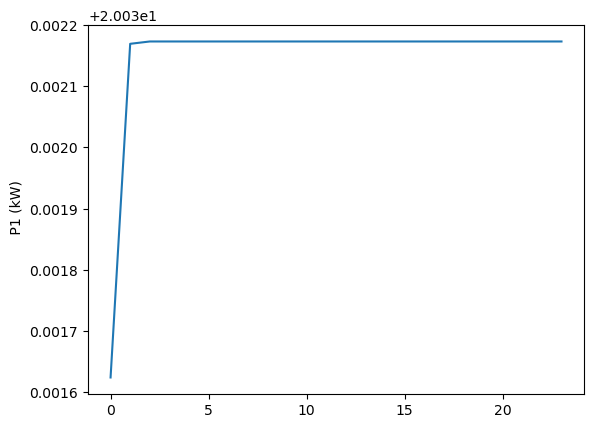

In [51]:
sns.lineplot(dfs['ptrafo'][' P1 (kW)'])

In [7]:
df_array = [pd.DataFrame(columns=_['header']) for _ in monitors_obj]
i = 0
for df in df_array:
    j=0
    for column in df.columns: 
        df[column] =  monitors_obj[j=0]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1861719610.py, line 6)

In [ ]:
dssObj.monitors.names
dssObj.monitors.save()
teste = dssObj.monitors.byte_stream.copy()
result = []
teste[0].decode()